In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
columns = ['Satisfaction Score', 'Card Type', 'NumOfProducts','Geography','Gender','HasCrCard','IsActiveMember','Complain']

for column in columns:
    unique_values = df[column].unique()
    print(f"The unique values are'{column}': {unique_values}")

The unique values are'Satisfaction Score': [2 3 5 4 1]
The unique values are'Card Type': ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
The unique values are'NumOfProducts': [1 3 2 4]
The unique values are'Geography': ['France' 'Spain' 'Germany']
The unique values are'Gender': ['Female' 'Male']
The unique values are'HasCrCard': [1 0]
The unique values are'IsActiveMember': [1 0]
The unique values are'Complain': [1 0]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [7]:
# Checking for null values:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

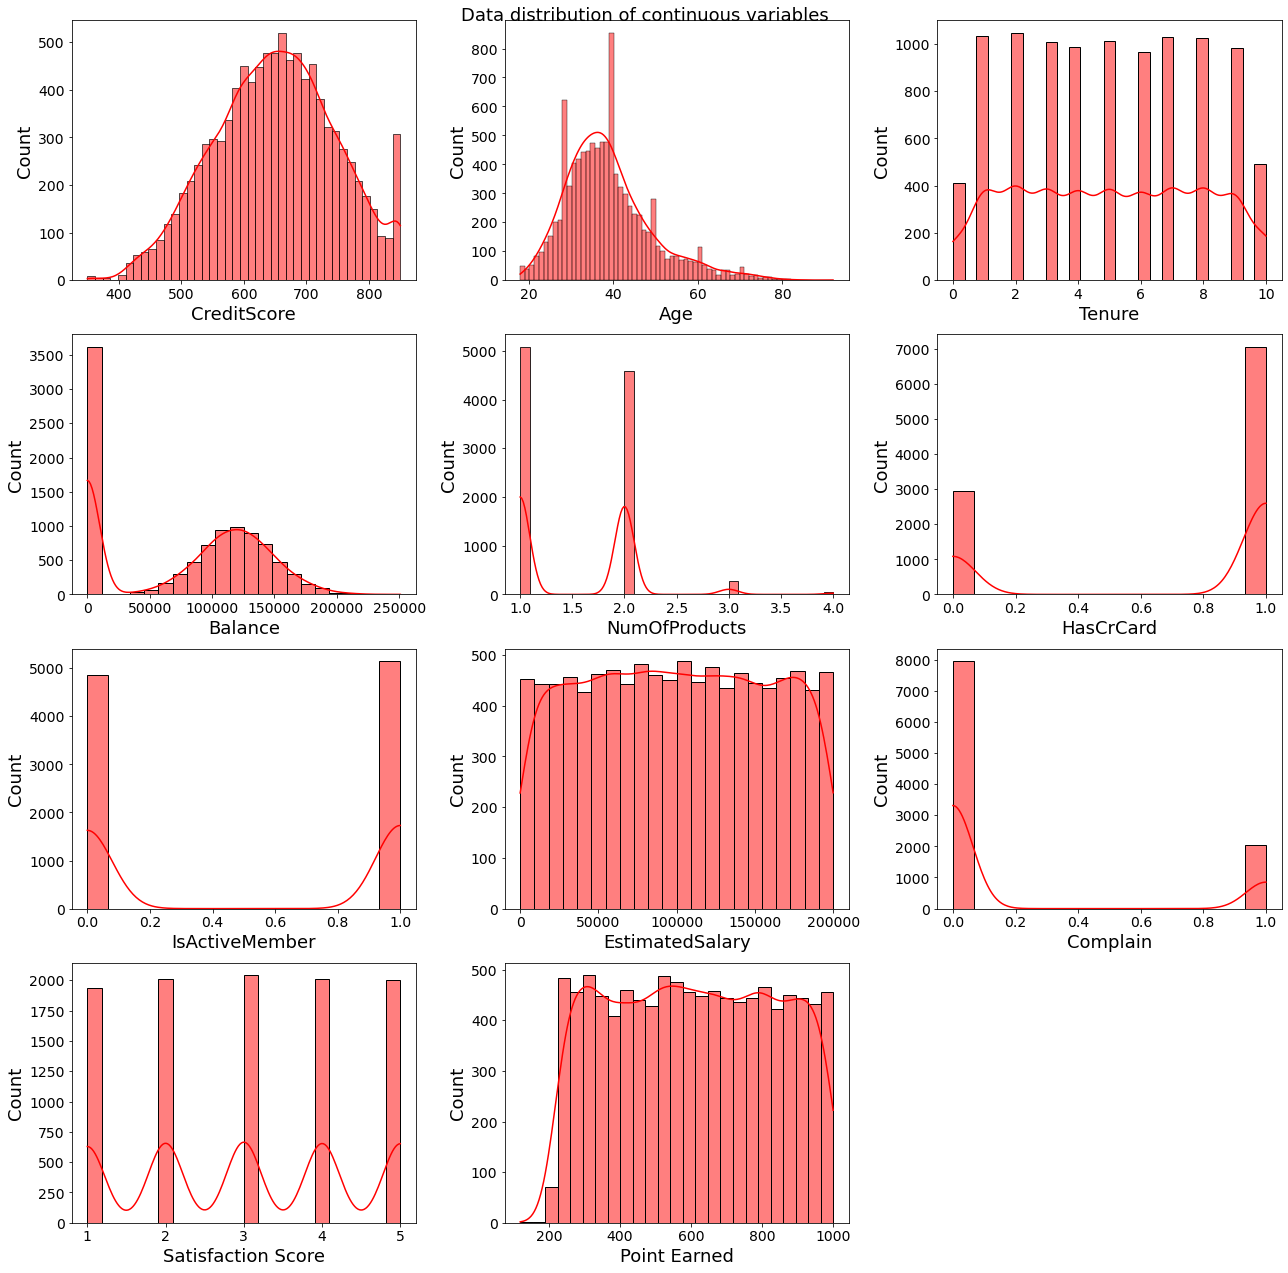

In [8]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['Exited'], axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4, 3, i+1)
    sns.histplot(data=df, x=col, ax=ax, color='red', kde=True)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    
plt.suptitle('Data distribution of continuous variables',fontsize=18)
plt.tight_layout()

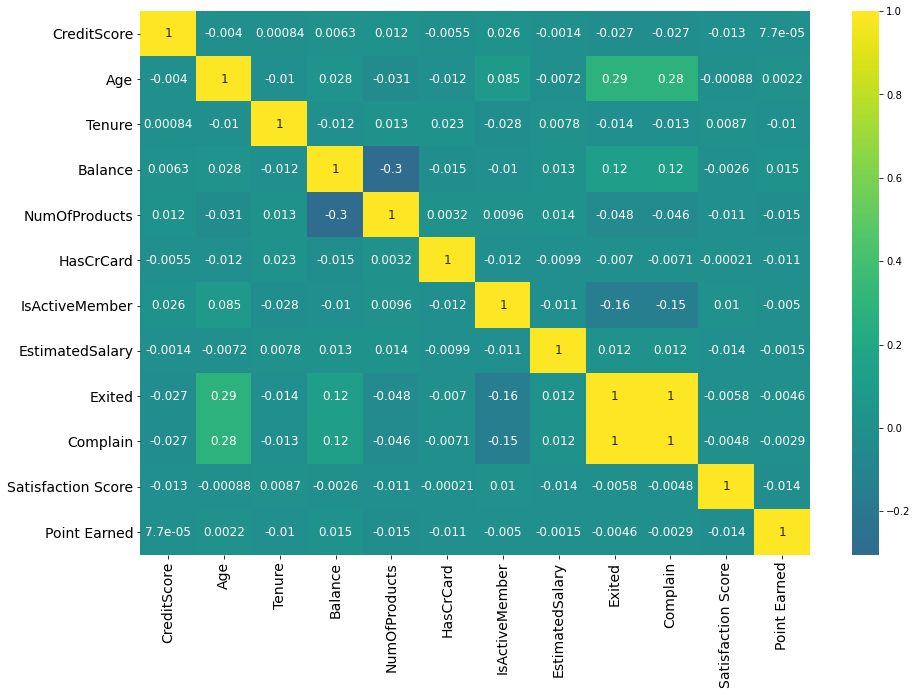

In [9]:
# Correlation between variables
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Perfect correlation between people who lodged complain and who exited

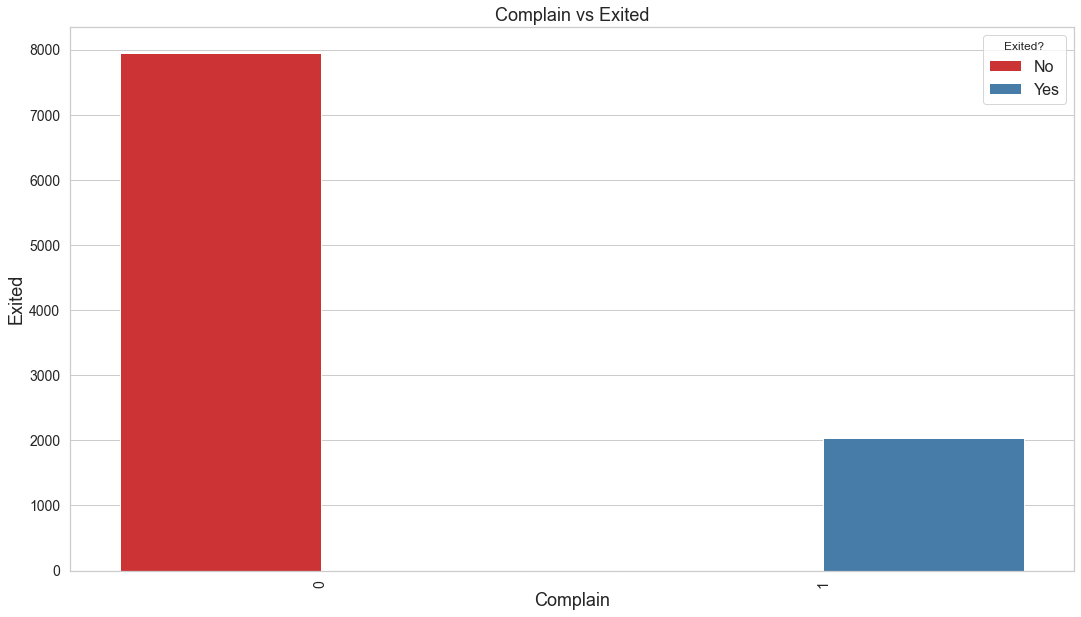

In [10]:
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.countplot(x="Complain", data=df,hue='Exited')
plt.xlabel("Complain",fontsize=18)
plt.ylabel("Exited",fontsize=18)
plt.title("Complain vs Exited",fontsize=18)
plt.legend(title="Exited?", labels=["No", "Yes"],fontsize=16)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [11]:
# Thus, dropping Complain column
df = df.drop('Complain', axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [12]:
# Defining interval limits
CreditScore_bins = [300, 400, 500, 600, 700, 800,900]
CreditScore_labels = [ '300-400', '400-500', '500-600', '600-700', '700-800','800-900']

In [13]:
#Age
Age_bins = [0, 20, 40, 60, 80, 100]
Age_labels = [ '0-20', '20-40', '40-60','60-80', '80-100']

df_copy = df.copy()

df_copy['Age Group'] = pd.cut(df_copy['Age'], bins=Age_bins, labels=Age_labels)

No_of_customers_Age_Exited = df_copy.groupby(['Age Group', 'Exited']).size().reset_index(name='Number of Customers')

No_of_customers_Age_Exited

,Age Group,Exited,Number of Customers
0,0-20,0,84
1,0-20,1,5
2,20-40,0,5648
3,20-40,1,682
4,40-60,0,1881
5,40-60,1,1236
6,60-80,0,338
7,60-80,1,114
8,80-100,0,11
9,80-100,1,1


In [14]:
#Tenure
Tenure_bins = [0, 2, 4, 6, 8, 10]
Tenure_labels = [ '0-2', '2-4', '4-6','6-8', '8-10']

df_copy = df.copy()
df_copy['Tenure Group'] = pd.cut(df_copy['Tenure'], bins=Tenure_bins, labels=Tenure_labels)

No_of_customers_Tenure_Exited = df_copy.groupby(['Tenure Group', 'Exited']).size().reset_index(name='Number of Customers')
No_of_customers_Tenure_Exited

,Tenure Group,Exited,Number of Customers
0,0-2,0,1650
1,0-2,1,433
2,2-4,0,1582
3,2-4,1,416
4,4-6,0,1574
5,4-6,1,405
6,6-8,0,1679
7,6-8,1,374
8,8-10,0,1159
9,8-10,1,315


In [16]:
# Encoding values in Geography and Gender columns
label_encoder = LabelEncoder()

In [22]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Card Type'] = label_encoder.fit_transform(df['Card Type'])

In [23]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377


In [24]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [26]:
# Scale the data with StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# initial model
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [31]:
# Training
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
118/118 [==============================] - 1s 3ms/step - loss: 0.4681 - accuracy: 0.7980
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8343
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8481
Epoch 4/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8543
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8581
Epoch 6/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8583
Epoch 7/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8596
Epoch 8/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8648
Epoch 9/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8633
Epoch 10/10
118/118 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8653

In [35]:
# Dropout model
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [36]:
# Training
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.5089 - accuracy: 0.7839
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.8019
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4424 - accuracy: 0.8119
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.8172
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8243
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8323
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8363
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3962 - accuracy: 0.8351
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8407
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8412

In [37]:
# Layer-wise Dropout model
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dropout(0.5))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))

In [38]:
# Training
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.5005 - accuracy: 0.7912
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.8003
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8081
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8165
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4150 - accuracy: 0.8288
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4005 - accuracy: 0.8323
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.8376
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.8363
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8383
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.3833 - accuracy: 0.8419

In [39]:
# Monte-Carlo Dropout model
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(1, activation='sigmoid'))

In [40]:
# Training
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.5023 - accuracy: 0.7815
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.8029
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.8191
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8167
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8276
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8327
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8385
Epoch 8/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8397
Epoch 9/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.8413
Epoch 10/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.8405

In [45]:
def predict_with_dropout(model, X, n_samples=20):
    predictions = [model.predict(X) for _ in range(n_samples)]
    return tf.reduce_mean(predictions, axis=0)

In [46]:
# Evaluate the Monte Carlo dropout model
monte_carlo_dropout_predictions = predict_with_dropout(model4, X_test)
monte_carlo_dropout_accuracy = accuracy_score(y_test, (monte_carlo_dropout_predictions.numpy() > 0.5).astype(int))
print("Monte Carlo Dropout Accuracy:", monte_carlo_dropout_accuracy)

79/79 [==============================] - 0s 1ms/step
Monte Carlo Dropout Accuracy: 0.8608


In [49]:
# Evaluate models
baseline_accuracy = accuracy_score(y_test, np.array(model1.predict(X_test) > 0.5, dtype=int))
dropout_accuracy = accuracy_score(y_test, np.array(model2.predict(X_test) > 0.5, dtype=int))
layerwise_dropout_accuracy = accuracy_score(y_test, np.array(model3.predict(X_test) > 0.5, dtype=int))
monte_carlo_dropout_accuracy = accuracy_score(y_test, np.array(predict_with_dropout(model4, X_test) > 0.5, dtype=int))

print("Baseline Accuracy:", baseline_accuracy)
print("Dropout Accuracy:", dropout_accuracy)
print("Layer-wise Dropout Accuracy:", layerwise_dropout_accuracy)
print("Monte Carlo Dropout Accuracy:", monte_carlo_dropout_accuracy)

79/79 [==============================] - 0s 1ms/step
Baseline Accuracy: 0.858
Dropout Accuracy: 0.8608
Layer-wise Dropout Accuracy: 0.8632
Monte Carlo Dropout Accuracy: 0.8608
